In [ ]:
pip install mlxtend

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
csv_file_path = 'Online Retail.csv'

df = pd.read_csv(csv_file_path)
initial_df=df
df

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# 1

# Preprocessing

In [2]:
column_names = list(df.columns)
for i in column_names:
    flage=df[i].isna().any()
    print(i)

index
InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country


In [3]:
df.dtypes

index            int64
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [4]:
def deduplication(df):
    df=df.drop_duplicates()
    return df

In [5]:
def remove_alpha_from_number(number_string):
    digits = [char for char in number_string if char.isdigit()]
    number_only = ''.join(digits)
    return number_only

In [6]:
def deleteAlphaCharacter(df):
    deep_copy = df.copy(deep=True)
    column_names = list(df.columns)
    for i in column_names:
        if i=='InvoiceNo' or i=='StockCode':
            row,col=deep_copy.shape
            for j in range(row):
                try:
                    int(deep_copy[i][j])
                except Exception as e:    
                    deep_copy[i][j]= remove_alpha_from_number(deep_copy[i][j])
                    if deep_copy[i][j]=="" or int(deep_copy[i][j])<9999:
                        deep_copy[i][j]=None
    return deep_copy  


In [7]:
def fillNull(df):
    deep_copy = df.copy(deep=True)
    column_names = list(df.columns)
    for i in column_names:
        if i!="Description":
            most_frequent_category = deep_copy[i].mode()[0]
            deep_copy[i].fillna(most_frequent_category, inplace=True)
            row,col=deep_copy.shape
            for j in range(row):
                if i!="InvoiceDate" and i!="Country" and int(deep_copy[i][j])<0:
                    deep_copy[i][j]=most_frequent_category            
    return deep_copy

In [8]:
def fillMisingValueWithMean(df):
    deep_copy = df.copy()
    column_names = list(deep_copy.columns)
    for i in column_names:
        if deep_copy[i].dtypes=="float64":
            deep_copy[i] = deep_copy[i].fillna(deep_copy[i].mean())
    return deep_copy

In [9]:
def modifyCatToNum(df):
    deep_copy = df.copy(deep=True)
    le = LabelEncoder()
    deep_copy["Country"] = le.fit_transform(deep_copy["Country"]) 
    return deep_copy   

In [10]:
def preprocessing(df):
    df1=deduplication(df)
    df2=deleteAlphaCharacter(df1)
    df3=fillNull(df2)
    df4=fillMisingValueWithMean(df3)
    df5=modifyCatToNum(df4)
    df_no_nan_Description = df5.dropna(subset=['Description'])
    return df_no_nan_Description
    

In [11]:
df=preprocessing(df)

C:\Users\Abedini\AppData\Local\Temp\ipykernel_21144\490733391.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deep_copy[i][j]= remove_alpha_from_number(deep_copy[i][j])
C:\Users\Abedini\AppData\Local\Temp\ipykernel_21144\490733391.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deep_copy[i][j]=None
C:\Users\Abedini\AppData\Local\Temp\ipykernel_21144\854485687.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deep_copy[i][j

In [12]:
df

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,36
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,36
2,2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,36
3,3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,36
4,4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,36
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,13
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,13
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,13
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,13


# EDA

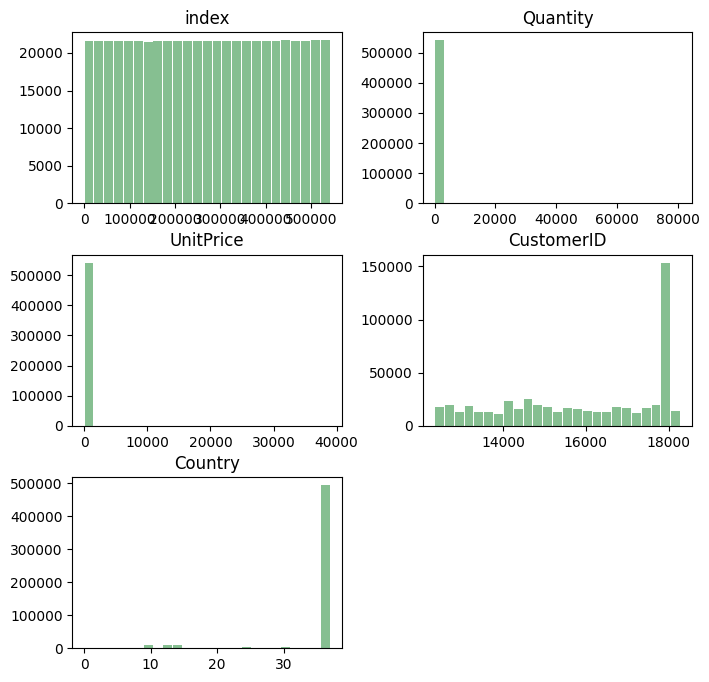

In [54]:
import matplotlib.pyplot as plt
df.hist(bins=25, grid=False, figsize=(8,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

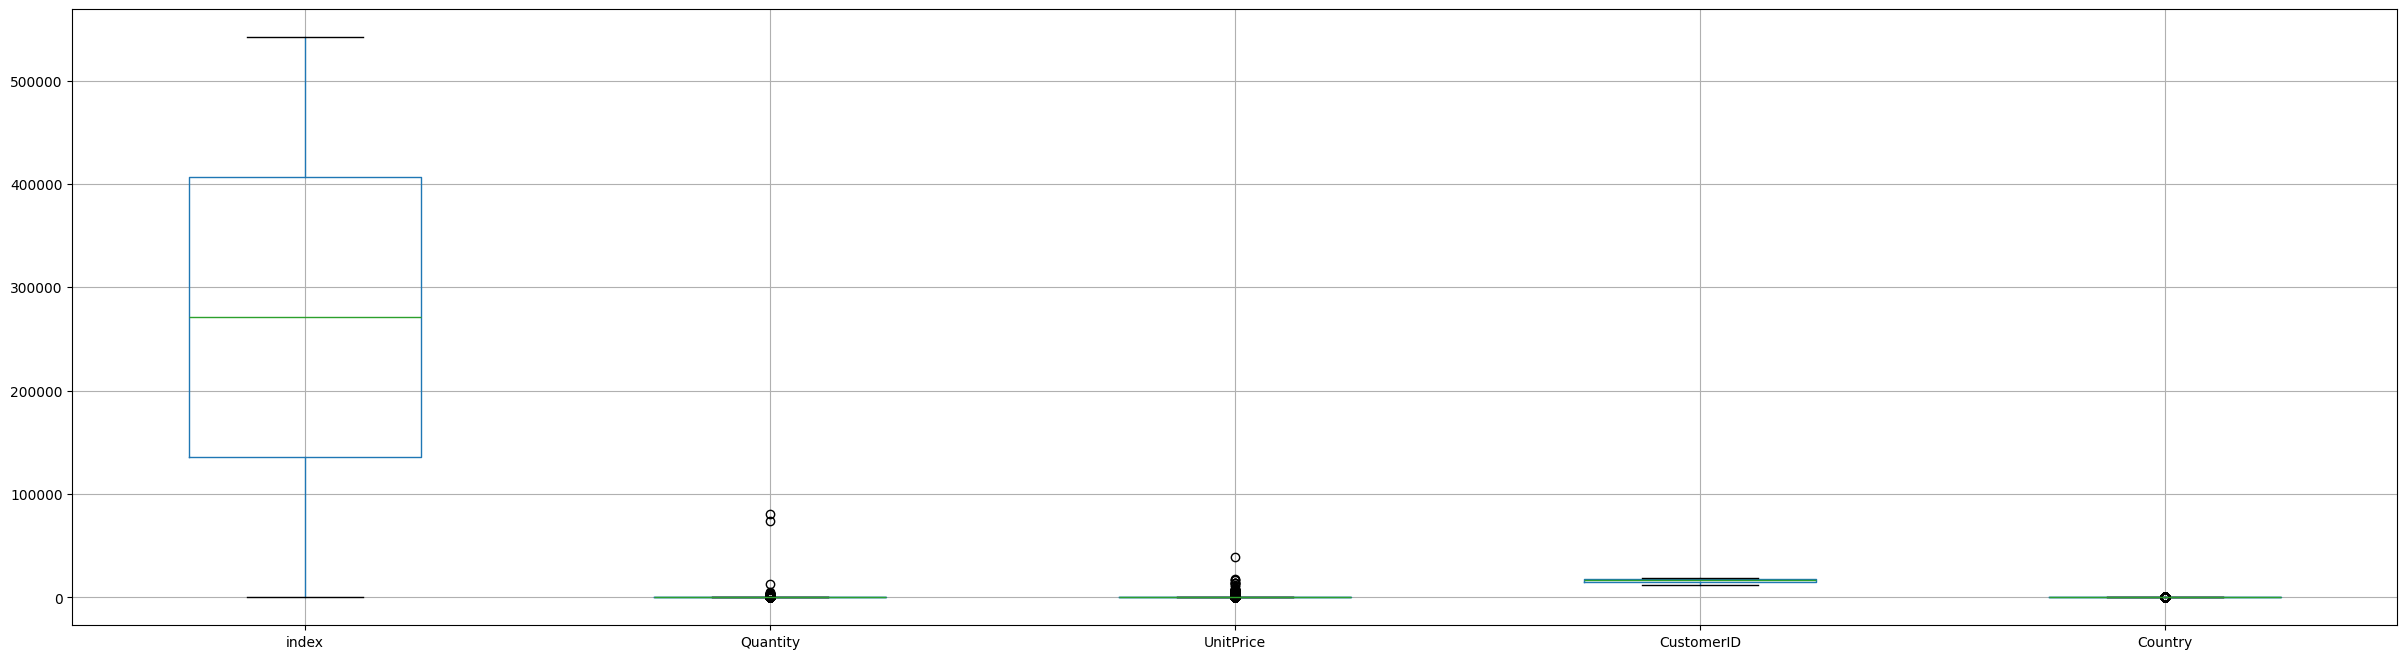

In [55]:
plt.figure(figsize=(30, 8))
df.boxplot()
plt.show()

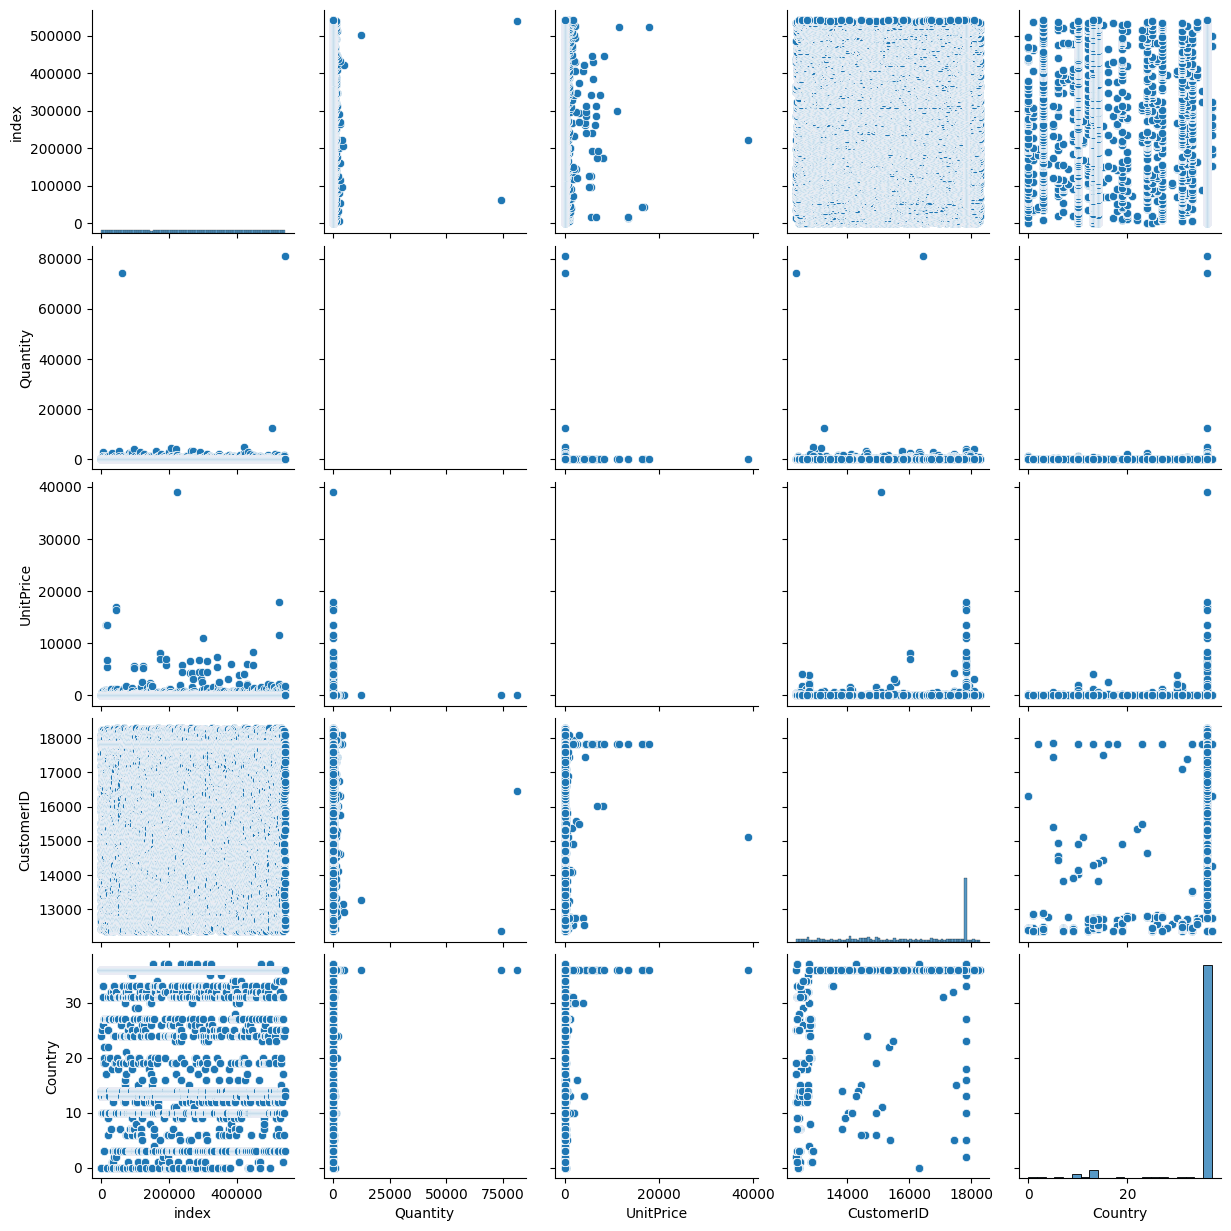

In [56]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [57]:
correlation_matrix = df.corr(method='pearson')
correlation_matrix


,index,Quantity,UnitPrice,CustomerID,Country
index,1.000000,0.000571,-0.004326,-0.044840,-0.001570
Quantity,0.000571,1.000000,-0.001915,-0.020443,-0.015956
UnitPrice,-0.004326,-0.001915,1.000000,0.010900,-0.001371
CustomerID,-0.044840,-0.020443,0.010900,1.000000,0.387926
Country,-0.001570,-0.015956,-0.001371,0.387926,1.000000


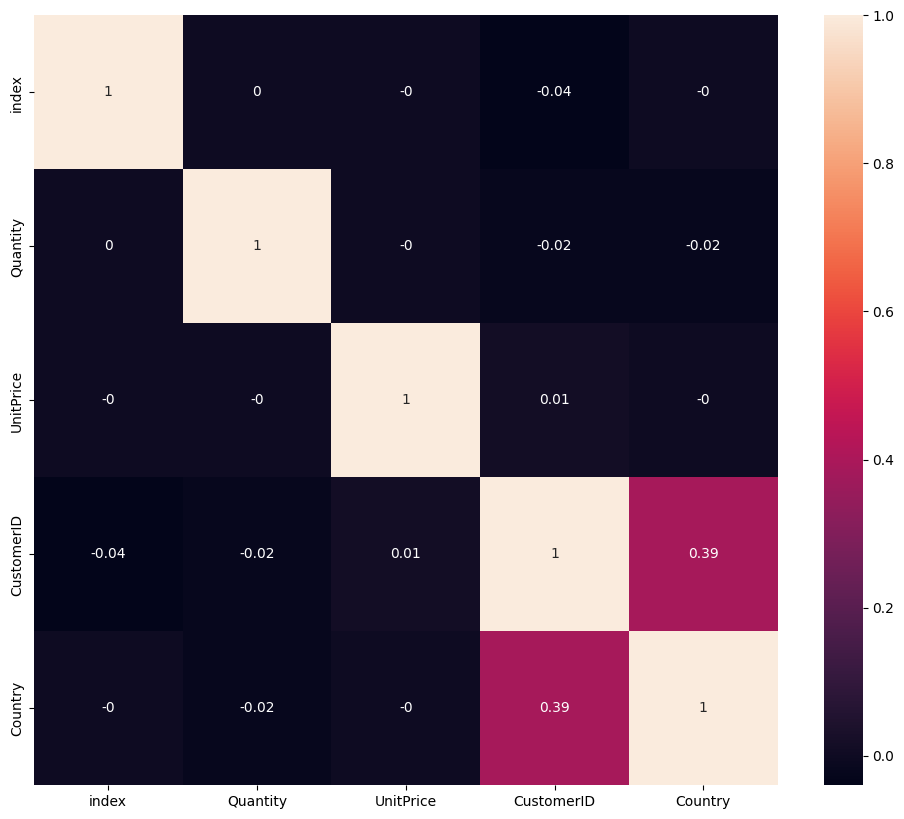

In [58]:
plt.figure(figsize=(12,10))
plt=sns.heatmap(correlation_matrix.round(2),annot=True)

In [13]:
def show_Height_lowest_selle(df):
    grouped = df.groupby('StockCode')
    df_grouped = grouped['Quantity'].sum()
    df_grouped=pd.DataFrame(df_grouped)
    df_grouped=df_grouped.sort_values(by='Quantity',ascending=False)
    heigth=df_grouped.head(10)
    low=df_grouped.tail(10)
    return heigth,low
    

In [14]:
heightesSell,lowestSell=show_Height_lowest_selle(df)

In [15]:
heightesSell

,Quantity
StockCode,
85099,91783
23843,80996
23166,78043
22197,56971
84077,55052
85123,41999
84879,36474
21212,36434
23084,30922


In [16]:
lowestSell

,Quantity
StockCode,
90021,1
90020,1
21645,1
77079,1
79320,1
79341,1
79342,1
23643,1
23609,1


# 2

In [17]:
def return_all_values(series):
    return list(series)

In [18]:
def groupbyHandler(df):
    grouped = df.drop(columns=['index','Description','Quantity',
                                        'InvoiceDate','UnitPrice','CustomerID','Country']).groupby('InvoiceNo').agg({'StockCode': return_all_values})
    df_grouped=pd.DataFrame(grouped)
    return df_grouped

In [19]:
df_grouped=groupbyHandler(df)

In [20]:
df_grouped

,StockCode
InvoiceNo,
536365,"[85123, 71053, 84406, 84029, 84029, 22752, 21730]"
536366,"[22633, 22632]"
536367,"[84879, 22745, 22748, 22749, 22310, 84969, 226..."
536368,"[22960, 22913, 22912, 22914]"
536369,[21756]
...,...
581583,"[20725, 85038]"
581584,"[20832, 85038]"
581585,"[22481, 22915, 22178, 22460, 84832, 23084, 848..."


# 3

In [67]:
def show_Height_lowest_selle_without_quantity(df_grouped):
    row,col=df_grouped.shape
    listStocks=[]
    dict_info={}
    for i in range(row):
        for j in range(len(df_grouped.iloc[i][0])):
            if df_grouped.iloc[i][0][j] not in listStocks:
                listStocks.append(df_grouped.iloc[i][0][j])
                dict_info[df_grouped.iloc[i][0][j]]=1    
            else:
                dict_info[df_grouped.iloc[i][0][j]]=dict_info[df_grouped.iloc[i][0][j]]+1
    df_=pd.DataFrame([dict_info]) 
    newDict=[]
    for i in range(len(df_.columns)):
        newDict.append({"stock":df_.columns[i],
                         "count":df_[df_.columns[i]][0]})
    df_=pd.DataFrame(newDict)
    df_=df_.sort_values(by='count',ascending=False)
    heigth=df_.head(10)
    low=df_.tail(10)
    return heigth,low

In [68]:
heigth,low=show_Height_lowest_selle_without_quantity(df_grouped)

In [69]:
heigth

,stock,count
44,85099,6949
0,85123,2380
1187,47566,2208
508,22423,2203
130,85049,1802
61,84997,1736
63,20725,1639
573,84596,1589
8,84879,1502
161,22197,1476


In [70]:
low

,stock,count
2632,84977,1
2628,84227,1
2626,85098,1
2622,35611,1
2267,21160,1
2266,20871,1
2613,90084,1
2018,85119,1
2015,21410,1
2340,21009,1


# 4

In [21]:
from mlxtend.frequent_patterns import apriori, fpmax, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [22]:
dataset=[]
row,col=df_grouped.shape
for i in range(row):
    dataset.append(df_grouped.iloc[i][0])        

In [23]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df_transaction = pd.DataFrame(te_ary, columns=te.columns_)

In [24]:
df_transaction

,10002,10080,10120,10123,10124,10125,10133,10135,11001,15030,...,90202,90204,90205,90206,90208,90209,90210,90211,90212,90214
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24441,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24442,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24443,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24444,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
frequent_itemsets_apriori = apriori(df_transaction, min_support=0.01, use_colnames=True)

In [26]:
frequent_itemsets_apriori

,support,itemsets
0,0.021353,(15036)
1,0.032480,(15056)
2,0.015708,(16161)
3,0.011904,(16237)
4,0.013254,(20675)
...,...,...
1330,0.010677,"(20724, 22355, 20719, 20723)"
1331,0.010308,"(20724, 22355, 22356, 20719)"
1332,0.010104,"(20724, 22355, 22356, 20723)"
1333,0.012395,"(85099, 22411, 21931, 22386)"


In [27]:
frequent_itemsets_fp_growth = fpmax(df_transaction, min_support=0.01, use_colnames=True)
frequent_itemsets_fp_growth

,support,itemsets
0,0.010022,(21716)
1,0.010022,(23310)
2,0.010022,(22634)
3,0.010022,(84792)
4,0.010022,(35961)
...,...,...
942,0.014808,"(20725, 47566)"
943,0.017467,"(47566, 22423)"
944,0.018367,"(47566, 85123)"
945,0.014767,"(22423, 85123)"


In [78]:
combined_itemsets = pd.concat([frequent_itemsets_apriori, frequent_itemsets_fp_growth])
itemsets_with_2_or_more_items = combined_itemsets[combined_itemsets['itemsets'].apply(lambda x: len(x) >= 2)]
itemsets_with_2_or_more_items

,support,itemsets
635,0.010022,"(85099, 15036)"
636,0.016567,"(85099, 15056)"
637,0.010513,"(85099, 20676)"
638,0.012272,"(85099, 20685)"
639,0.011822,"(20712, 20711)"
...,...,...
942,0.014808,"(20725, 47566)"
943,0.017467,"(47566, 22423)"
944,0.018367,"(85123, 47566)"
945,0.014767,"(85123, 22423)"


In [79]:
top_10_itemsets = itemsets_with_2_or_more_items.sort_values(by='support', ascending=False).head(10)
top_10_itemsets

,support,itemsets
971,0.041888,"(85099, 22386)"
859,0.039516,"(85099, 21931)"
978,0.036529,"(85099, 22411)"
725,0.033502,"(85099, 20725)"
1034,0.032071,"(22697, 22699)"
1119,0.031130,"(85099, 23203)"
1104,0.030271,"(85099, 23199)"
654,0.030230,"(20712, 85099)"
841,0.027653,"(21929, 85099)"
835,0.027448,"(85099, 21928)"


# 5

In [28]:
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.2)

In [29]:
rules_apriori

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(15036),(85099),0.021353,0.195533,0.010022,0.469349,2.400355,0.005847,1.515999,0.596124
1,(15056),(85099),0.032480,0.195533,0.016567,0.510076,2.608642,0.010216,1.642023,0.637360
2,(20676),(85099),0.018449,0.195533,0.010513,0.569845,2.914315,0.006906,1.870178,0.669212
3,(20685),(85099),0.028798,0.195533,0.012272,0.426136,2.179358,0.006641,1.401843,0.557195
4,(20711),(20712),0.021762,0.035670,0.011822,0.543233,15.229216,0.011046,2.111207,0.955122
...,...,...,...,...,...,...,...,...,...,...
1693,"(22423, 22698)","(22697, 22699)",0.016444,0.032071,0.012395,0.753731,23.502189,0.011867,3.930380,0.973459
1694,"(22699, 22698)","(22697, 22423)",0.025117,0.021190,0.012395,0.493485,23.289079,0.011862,1.932442,0.981719
1695,(22697),"(22698, 22423, 22699)",0.043238,0.013785,0.012395,0.286660,20.794359,0.011799,1.382531,0.994929
1696,(22699),"(22697, 22423, 22698)",0.045815,0.014154,0.012395,0.270536,19.114208,0.011746,1.351466,0.993186


In [82]:
combined_itemsets=association_rules(combined_itemsets, metric="confidence", min_threshold=0.2)

In [83]:
combined_itemsets

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(15036),(85099),0.021353,0.195533,0.010022,0.469349,2.400355,0.005847,1.515999,0.596124
1,(15056),(85099),0.032480,0.195533,0.016567,0.510076,2.608642,0.010216,1.642023,0.637360
2,(20676),(85099),0.018449,0.195533,0.010513,0.569845,2.914315,0.006906,1.870178,0.669212
3,(20685),(85099),0.028798,0.195533,0.012272,0.426136,2.179358,0.006641,1.401843,0.557195
4,(20712),(20711),0.035670,0.021762,0.011822,0.331422,15.229216,0.011046,1.463162,0.968898
...,...,...,...,...,...,...,...,...,...,...
1693,"(22699, 22423)","(22697, 22698)",0.021967,0.026344,0.012395,0.564246,21.418561,0.011816,2.234416,0.974723
1694,"(22698, 22699)","(22697, 22423)",0.025117,0.021190,0.012395,0.493485,23.289079,0.011862,1.932442,0.981719
1695,(22697),"(22699, 22698, 22423)",0.043238,0.013785,0.012395,0.286660,20.794359,0.011799,1.382531,0.994929
1696,(22698),"(22697, 22699, 22423)",0.032766,0.016853,0.012395,0.378277,22.445057,0.011842,1.581326,0.987814


In [84]:
top_10_rules = combined_itemsets.sort_values(by='confidence', ascending=False).head(10)

In [85]:
top_10_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1593,"(20712, 22386, 21931)",(85099),0.011413,0.195533,0.011249,0.985663,5.040904,0.009018,56.111572,0.810877
1605,"(20712, 22411, 21931)",(85099),0.011249,0.195533,0.011045,0.981818,5.021240,0.008845,44.245684,0.809957
1675,"(22411, 22386, 21931)",(85099),0.012681,0.195533,0.012395,0.977419,4.998743,0.009915,35.626395,0.810224
1618,"(20712, 22411, 22386)",(85099),0.010390,0.195533,0.010145,0.976378,4.993417,0.008113,34.055769,0.808133
1414,"(22386, 22379)",(85099),0.012231,0.195533,0.011904,0.973244,4.977390,0.009512,30.066954,0.808986
1419,"(22411, 22379)",(85099),0.010554,0.195533,0.010186,0.965116,4.935823,0.008122,23.061387,0.805905
922,"(20712, 22386)",(85099),0.017631,0.195533,0.016976,0.962877,4.924371,0.013529,21.670330,0.811231
874,"(20712, 21928)",(85099),0.011290,0.195533,0.010799,0.956522,4.891868,0.008592,18.502741,0.804664
865,"(22411, 20711)",(85099),0.010881,0.195533,0.010390,0.954887,4.883509,0.008263,17.832352,0.803977
1349,"(21930, 22411)",(85099),0.012313,0.195533,0.011699,0.950166,4.859364,0.009292,16.142971,0.804113


# 6

In [86]:
def top_Lift_Items_Handler(df):
    df=df[df["lift"]>10]
    top_10 = df.sort_values(by='confidence', ascending=False).head(10)
    return top_10

In [87]:
top_Lift_Items_Handler(combined_itemsets)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1525,"(23170, 23172)",(23171),0.011127,0.015790,0.010554,0.948529,60.071891,0.010378,19.121796,0.994418
1524,"(23171, 23172)",(23170),0.011536,0.018694,0.010554,0.914894,48.939802,0.010338,11.530342,0.990999
1660,"(22356, 20723, 22355)",(20724),0.011167,0.042952,0.010104,0.904762,21.064580,0.009624,10.049006,0.963284
1688,"(22699, 22698, 22423)",(22697),0.013785,0.043238,0.012395,0.899110,20.794359,0.011799,9.483198,0.965216
724,(23172),(23171),0.012845,0.015790,0.011536,0.898089,56.877430,0.011333,9.657562,0.995201
1292,"(21080, 21086)",(21094),0.012108,0.021558,0.010840,0.895270,41.528989,0.010579,9.342546,0.987882
1492,"(22698, 22699)",(22697),0.025117,0.043238,0.022458,0.894137,20.679346,0.021372,9.037720,0.976160
1685,"(22697, 22698, 22423)",(22699),0.014154,0.045815,0.012395,0.875723,19.114208,0.011746,7.677859,0.961289
722,(23172),(23170),0.012845,0.018694,0.011127,0.866242,46.337315,0.010886,7.336429,0.991150
1472,"(22698, 22423)",(22697),0.016444,0.043238,0.014154,0.860697,19.905948,0.013443,6.868183,0.965643


# 7

In [88]:
def show_association_rules_antecedents3item_consequents1item(df):
    row,col=df.shape
    listOfInfoDf=[]
    for i in range(row):
        if (len(df["antecedents"][i])==3) and (len(df["consequents"][i])==1):
            listOfInfoDf.append(df.iloc[i].to_dict())
    new_df=pd.DataFrame(listOfInfoDf)
    new_df=new_df.sort_values(by='confidence', ascending=False)
    return new_df

In [89]:
show_association_rules_antecedents3item_consequents1item(combined_itemsets)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,"(20712, 22386, 21931)",(85099),0.011413,0.195533,0.011249,0.985663,5.040904,0.009018,56.111572,0.810877
5,"(20712, 22411, 21931)",(85099),0.011249,0.195533,0.011045,0.981818,5.021240,0.008845,44.245684,0.809957
27,"(22411, 22386, 21931)",(85099),0.012681,0.195533,0.012395,0.977419,4.998743,0.009915,35.626395,0.810224
9,"(20712, 22411, 22386)",(85099),0.010390,0.195533,0.010145,0.976378,4.993417,0.008113,34.055769,0.808133
22,"(22356, 20723, 22355)",(20724),0.011167,0.042952,0.010104,0.904762,21.064580,0.009624,10.049006,0.963284
31,"(22699, 22698, 22423)",(22697),0.013785,0.043238,0.012395,0.899110,20.794359,0.011799,9.483198,0.965216
28,"(22697, 22698, 22423)",(22699),0.014154,0.045815,0.012395,0.875723,19.114208,0.011746,7.677859,0.961289
15,"(20719, 20723, 22355)",(20724),0.012436,0.042952,0.010677,0.858553,19.988741,0.010142,6.766108,0.961934
18,"(22356, 20719, 22355)",(20724),0.012027,0.042952,0.010308,0.857143,19.955918,0.009792,6.699337,0.961452
12,"(20724, 20719, 20723)",(22355),0.013417,0.036611,0.010677,0.795732,21.734589,0.010185,4.716291,0.966964
